# 学习率调整总结

## 一、对SGD,minibatch-SGD和GD的理解

### 1.GD：  
    在整个训练集中计算当前梯度，选定步长进行反向传播对参数进行更新；GD优点：由于是计算所有训练样本得到的梯度，梯度估计相对准确；  
    缺点：（1）GD的梯度计算时间耗费比较大；（2）现代深度学习的loss往往是非凸的，基于凸优化理论的优化算法只能收敛到局部最小解  
### 2.SGD(Stochastic Gradient Descent):  
    随机梯度下降，每次只随机从训练集中抽取一个样本计算梯度，优点是计算快，缺点是单个样本梯度表征不准确，适合使用较小的学习率进行更新；  
    由于现在计算机算力的提升，单样本无法充分利用计算机的性能，造成算力资源浪费  
### 3.minibatch-SGD:  
    折中方案，一次从训练集中抽取batchsize数量的训练样本来估计梯度，梯度估计相对准确，又能充分发挥gpu及cpu的计算力；同时minibatch计算出的  
    梯度能够有一定的噪声，有助于训练过程中跳出具备最优解
### 4.batchsize对梯度估计的影响   
    根据公式推导，当batchsize增大m倍，相当于将梯度的方差减少m倍，因此梯度估计将更加准确
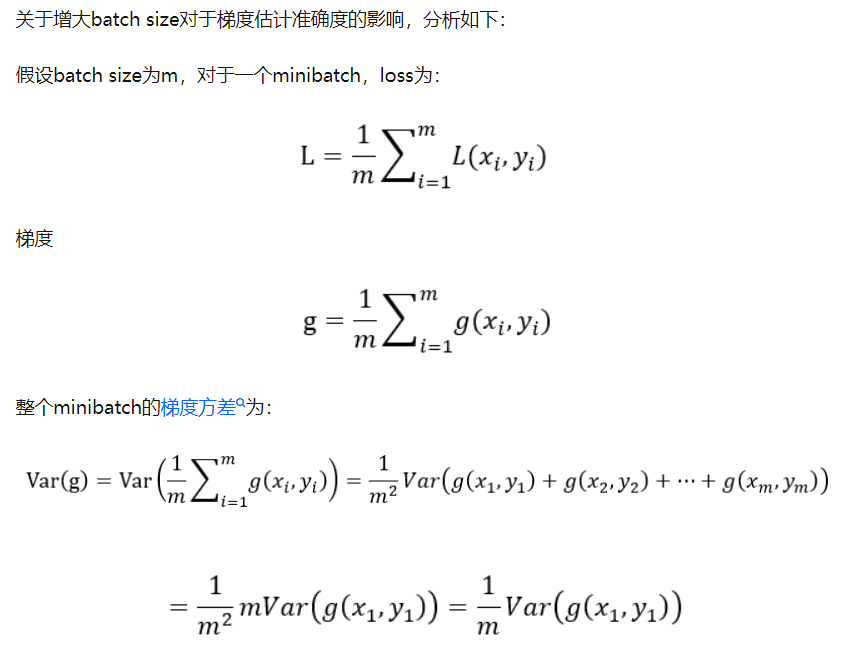
### 5.batchsize增大lr调整  
    如果要保持方差和原来的保持不变，可以通过增大lr的方式实现，可以将lr增加至sqrt(m)倍，以提高训练速度。
    当增加训练的batchsize为原先的m倍，会造成对训练集的一次迭代参数更新次数变为原来的1/m，参数更新不够充分，需要增加训练的epoch  
    而且由于batchsize的增大，梯度估计更加准确，接近GD梯度，容易陷入具备最小解。
    当batchsize增大，可通过调节lr实现同样的训练效果，调整的参考为lr——klr，具体需进行调参
   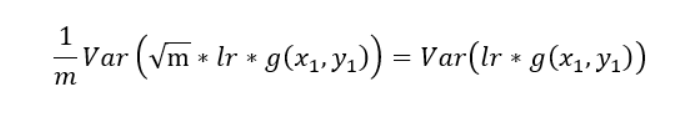
   

## 三、pytorch常用学习率衰减函数

In [7]:
# 导入需要的库
import torch
import matplotlib.pyplot as plt
from torchvision import models
import math
%matplotlib inline

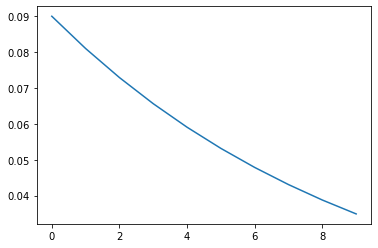

In [27]:
# torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambdam, last_epoch=-1, verbose=False)
model = models.resnet50(pretrained=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# lambda 输入为当前epoch，输出为lr调整倍率
lambda1 = lambda epoch: 0.9**epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
# 绘图
x = list(range(10))
y = []
for epoch in range(10):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

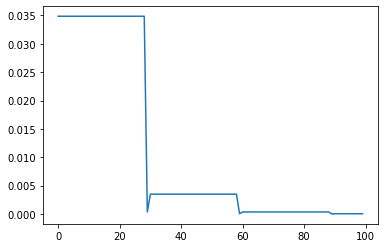

In [28]:
# torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1) gamma为学利率调整倍率，step_size为调整步长
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
x = list(range(100))
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

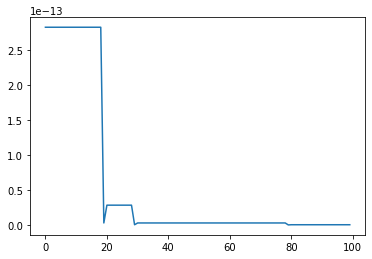

In [22]:
# torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1) lr = 指点epoch时迭代为lr*gamma
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [20, 30, 80], gamma=0.1)  # 数字为调整学习率的epoch数
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

E:\anaconda\envs\pytorch-gpu\lib\site-packages\torch\optim\lr_scheduler.py:572: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


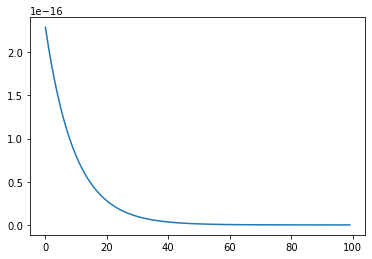

In [23]:
# torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  lr = lr*gamma**epoch
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

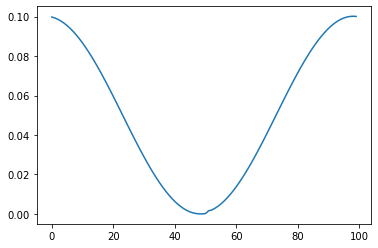

In [34]:
# torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0) # T_max:余弦周期的一半，eta_min:最小学习率，默认为0
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-7) # T_max:为余弦周期的一半
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

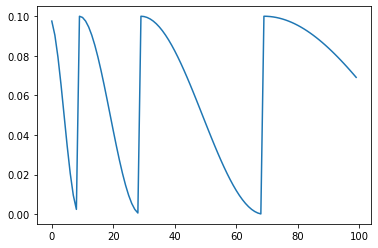

In [37]:
# torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0, T_mult=1, eta_min=0) T_0：第一次restart时的数值；
# T_mult:restart周期增加因子
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-7)
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()

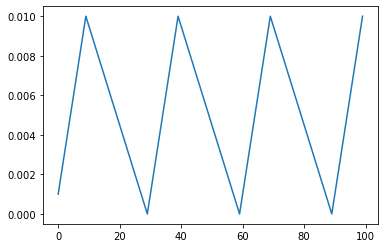

In [41]:
# torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr, max_lr, step_size_up, step_size_down, mode='triangular', gamma=1.0)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-7, max_lr=1e-2, step_size_up=10, step_size_down=20, gamma=0.97)
y = []
for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(lr[0])
plt.plot(x, y)
plt.show()